<a href="https://colab.research.google.com/github/Melisa7L/PPS/blob/main/Limpieza_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpieza de datos con Phyton y Pandas

El set de datos
La informacion de las noticias fue recolectada y se encuentra en un archivo xlsx
Cada registro contiene 5 caracteristicas(columnas) y se cuenta con un total de 31352 registros. Esas columnas son:

1. **fecha_noticia** : es la fecha de la publicó
2. **titulo_noticia**:es el titulo de la noticia
3. **texto_noticia**: contiene toda la informacion de la noticia
4. **longitud_noticia**:es la cantidad de caracteres que conforman la noticia
5. **categoria**: dice a que categoria(salud,economia y finanzas,ciencia y tecnologia,entretenimiento,cultura,educacion,deportes,horoscopo,medioambiente,politica)pertenece la noticia.







Ahora vamos a ver el dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
data = pd.read_excel(ruta)


Mounted at /gdrive


In [ ]:
print(data.shape)
data.head()

(31351, 5)


,fecha_noticia,titulo_noticia,texto_noticia,longitud_noticia,categoria
0,Fecha no encontrada,403 Forbidden,NaN,0,ciencia_tecnologia
1,Fecha no encontrada,NaN,Abonados Editado por europa press Nueva eviden...,1776,ciencia_tecnologia
2,2023-05-03T12:00:00Z,El debate de la ética de la IA no es tecnológi...,Facebook\nTwitter\nImprimir\nCorreo electrónic...,16533,ciencia_tecnologia
3,2023-09-01 13:16:41,Presidencia de la Nación,Hasta el 22 de septiembre las instituciones po...,3079,ciencia_tecnologia
4,Fecha no encontrada,Investigadores identifican 574 especies exótic...,"Menú Abonados ALICANTE, 27 Jun. (EUROPA PRESS)...",3389,ciencia_tecnologia


In [3]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31351 entries, 0 to 31350
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_noticia     31351 non-null  object
 1   titulo_noticia    31262 non-null  object
 2   texto_noticia     31347 non-null  object
 3   longitud_noticia  31351 non-null  int64 
 4   categoria         31351 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


**Limpieza**

Para la limpieza se va a tener en cuenta:

1. Datos faltantes en algunas celdas
2. Registros (filas) repetidos
3. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
4. Errores tipográficos en el caso de las variables categóricas

Desarrollo del punto 1 que serian los datos faltantes
Acá se observa que no todas las columnas tienen la misma cantidad de registros. El total de registros es 31352 y hay columnas que no tienen esa cantidad:

0   fecha_noticia     31351 non-null  object
 1   titulo_noticia    31262 non-null  object
 2   texto_noticia     31347 non-null  object
 3   longitud_noticia  31351 non-null  int64
 4   categoria         31351 non-null  object
dtypes: int64(1), object(4)

Por ser tan pocos los datos  faltantes se decidio eliminar las filas correspondientes:

In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31258 entries, 2 to 31350
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_noticia     31258 non-null  object
 1   titulo_noticia    31258 non-null  object
 2   texto_noticia     31258 non-null  object
 3   longitud_noticia  31258 non-null  int64 
 4   categoria         31258 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


Desarrollo del punto 2 que seria registros repetidos


In [5]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (31258, 5)
Tamaño del set después de eliminar las filas repetidas: (28276, 5)


Desarrollo del punto 3 : Outliers

Text(0.5, 1.0, 'longitud_noticia')

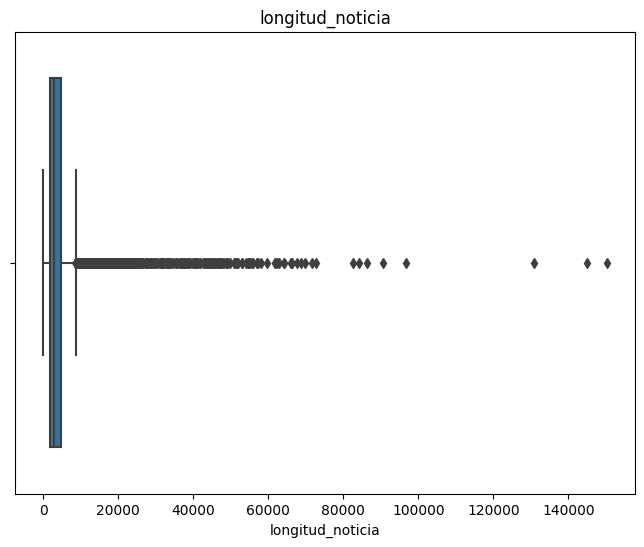

In [6]:
# Genera la gráfica para ver la longitud de la noticia
cols_num = ['longitud_noticia']

fig, ax = plt.subplots(figsize=(8, 6))  # Crear un solo gráfico

col = cols_num[0]  # Seleccionar la primera columna numérica
sns.boxplot(x=col, data=data, ax=ax)
ax.set_title(col)


Desarrollo del punto 4 : Errores tipograficos

<ipython-input-7-131641920183>:11: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente los subgráficos para evitar superposiciones
<ipython-input-7-131641920183>:11: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente los subgráficos para evitar superposiciones
<ipython-input-7-131641920183>:11: UserWarning: Glyph 148 (\x94) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente los subgráficos para evitar superposiciones
<ipython-input-7-131641920183>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar automáticamente los subgráficos para evitar superposiciones
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/usr

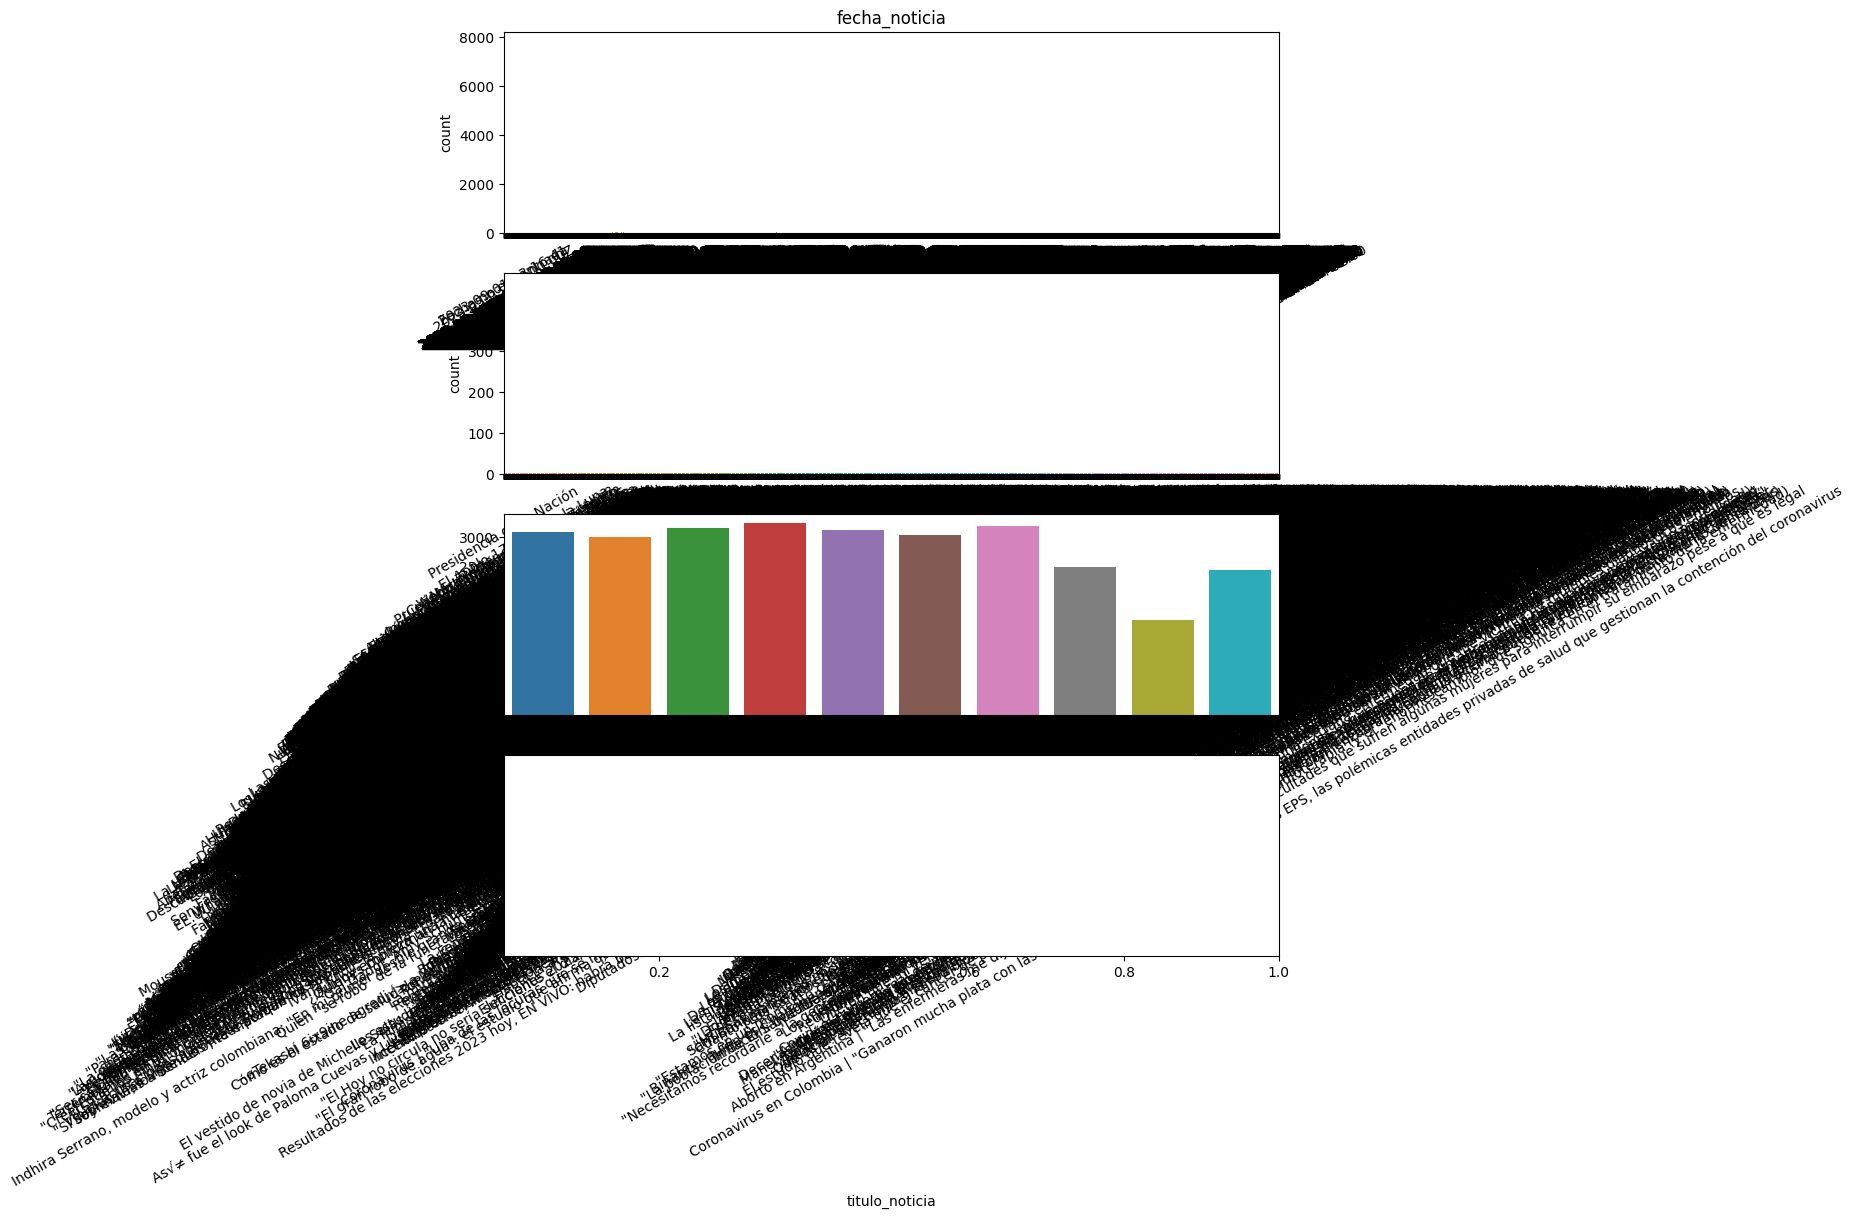

In [7]:
# Columnas categóricas que deseas graficar (sin 'texto_noticia')
cols_cat = ['fecha_noticia', 'titulo_noticia', 'categoria']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))  # Crear 4 gráficos

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.tight_layout()  # Ajustar automáticamente los subgráficos para evitar superposiciones


In [8]:
data.shape

(28276, 5)

In [12]:
ruta = "/gdrive/My Drive/Limpieza/Data_Completo_Limpio.xlsx"
data.to_excel(ruta, index=False)